<a href="https://colab.research.google.com/github/Thiago-Alencar/telecom_x_prevendo_churn/blob/main/Telecom_X_Prevendo_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descrição do Desafio

Nossa missão é construir, treinar e avaliar modelos de classificação para prever a evasão de clientes. O objetivo final é fornecer à empresa uma ferramenta para identificar proativamente os clientes em risco e entender os principais fatores que impulsionam o churn, permitindo a criação de estratégias de retenção mais eficientes.

##2. Extração do Arquivo Tratado

Vamos começar carregando o conjunto de dados que preparamos na fase de análise exploratória.

In [1]:
# Importando bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style("whitegrid")

# Carregar o dataset tratado
try:
    df = pd.read_csv('dados_tratados.csv')
    print("✅ Etapa 2: Arquivo 'dados_tratados.csv' carregado com sucesso!")
    display(df.head())
except FileNotFoundError:
    print("❌ Erro: Arquivo 'dados_tratados.csv' não encontrado. Por favor, faça o upload do arquivo para o ambiente do Colab.")
    df = None

✅ Etapa 2: Arquivo 'dados_tratados.csv' carregado com sucesso!


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##3. Identificação e Remoção de Colunas Irrelevantes

A coluna customerID é um identificador único para cada cliente e não possui poder preditivo. Mantê-la no modelo poderia confundí-lo. Vamos removê-la.

In [2]:
if df is not None:
    if 'customerID' in df.columns:
        df = df.drop('customerID', axis=1)
        print("✅ Etapa 3: Coluna 'customerID' removida com sucesso.")
    else:
        print("ℹ️ Etapa 3: Coluna 'customerID' não encontrada no dataset.")

✅ Etapa 3: Coluna 'customerID' removida com sucesso.


##4. Encoding

Os modelos de machine learning requerem que todas as variáveis de entrada sejam numéricas. Converteremos as colunas de texto (categóricas) usando a técnica de One-Hot Encoding.

In [3]:
if df is not None:
    # Identificando colunas do tipo 'object' para encoding
    colunas_categoricas = df.select_dtypes(include=['object']).columns

    # Aplicando One-Hot Encoding com pd.get_dummies
    df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

    print("✅ Etapa 4: Encoding realizado. Amostra dos dados transformados:")
    display(df_encoded.head())

✅ Etapa 4: Encoding realizado. Amostra dos dados transformados:


,Churn,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,Contas_Diarias,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,...,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,0,9,65.6,593.30,2.186667,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,1.996667,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,2.463333,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,3.266667,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,2.796667,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


##5. Verificação da Proporção de Evasão

É crucial verificar se as classes da nossa variável alvo (Churn) estão balanceadas. Um desequilíbrio pode levar o modelo a ficar "preguiçoso" e prever sempre a classe majoritária.

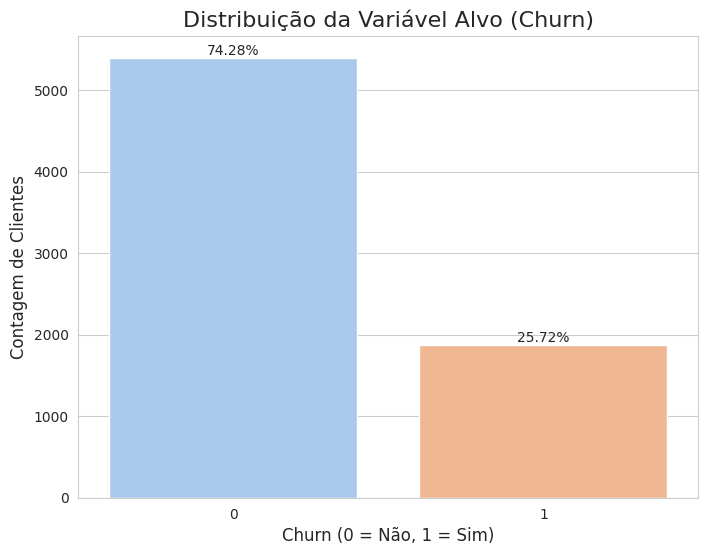

✅ Etapa 5: Análise de Desequilíbrio:
   - Clientes que permaneceram (Classe 0): 74.28%
   - Clientes que evadiram (Classe 1): 25.72%
   - Conclusão: As classes estão desbalanceadas. Isso justifica a aplicação de uma técnica de balanceamento.


In [4]:
if 'Churn' in df_encoded.columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Churn', data=df_encoded, palette='pastel', hue='Churn', legend=False)
    plt.title('Distribuição da Variável Alvo (Churn)', fontsize=16)
    plt.xlabel('Churn (0 = Não, 1 = Sim)', fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)

    # Adicionando percentuais
    total = len(df_encoded['Churn'])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()

    churn_rate = df_encoded['Churn'].value_counts(normalize=True) * 100
    print(f"✅ Etapa 5: Análise de Desequilíbrio:")
    print(f"   - Clientes que permaneceram (Classe 0): {churn_rate[0]:.2f}%")
    print(f"   - Clientes que evadiram (Classe 1): {churn_rate[1]:.2f}%")
    print("   - Conclusão: As classes estão desbalanceadas. Isso justifica a aplicação de uma técnica de balanceamento.")

##6. Balanceamento de Classes

Para corrigir o desequilíbrio, usaremos a técnica SMOTE (Synthetic Minority Over-sampling Technique). Ela cria novas amostras sintéticas da classe minoritária, em vez de simplesmente duplicar dados, resultando em um modelo mais robusto.

Importante: O balanceamento deve ser aplicado apenas nos dados de treino para não contaminar o conjunto de teste, que deve simular a realidade. Faremos isso após a divisão dos dados.

##7. Normalização ou Padronização

A padronização (ou normalização) coloca todas as variáveis numéricas na mesma escala. Isso é essencial para modelos sensíveis à distância, como Regressão Logística e KNN. Usaremos o StandardScaler. Assim como o SMOTE, ele será treinado nos dados de treino e aplicado nos dados de teste.

##8. Análise de Correlação

Vamos revisitar a correlação para ter uma última visão das relações lineares antes da modelagem.

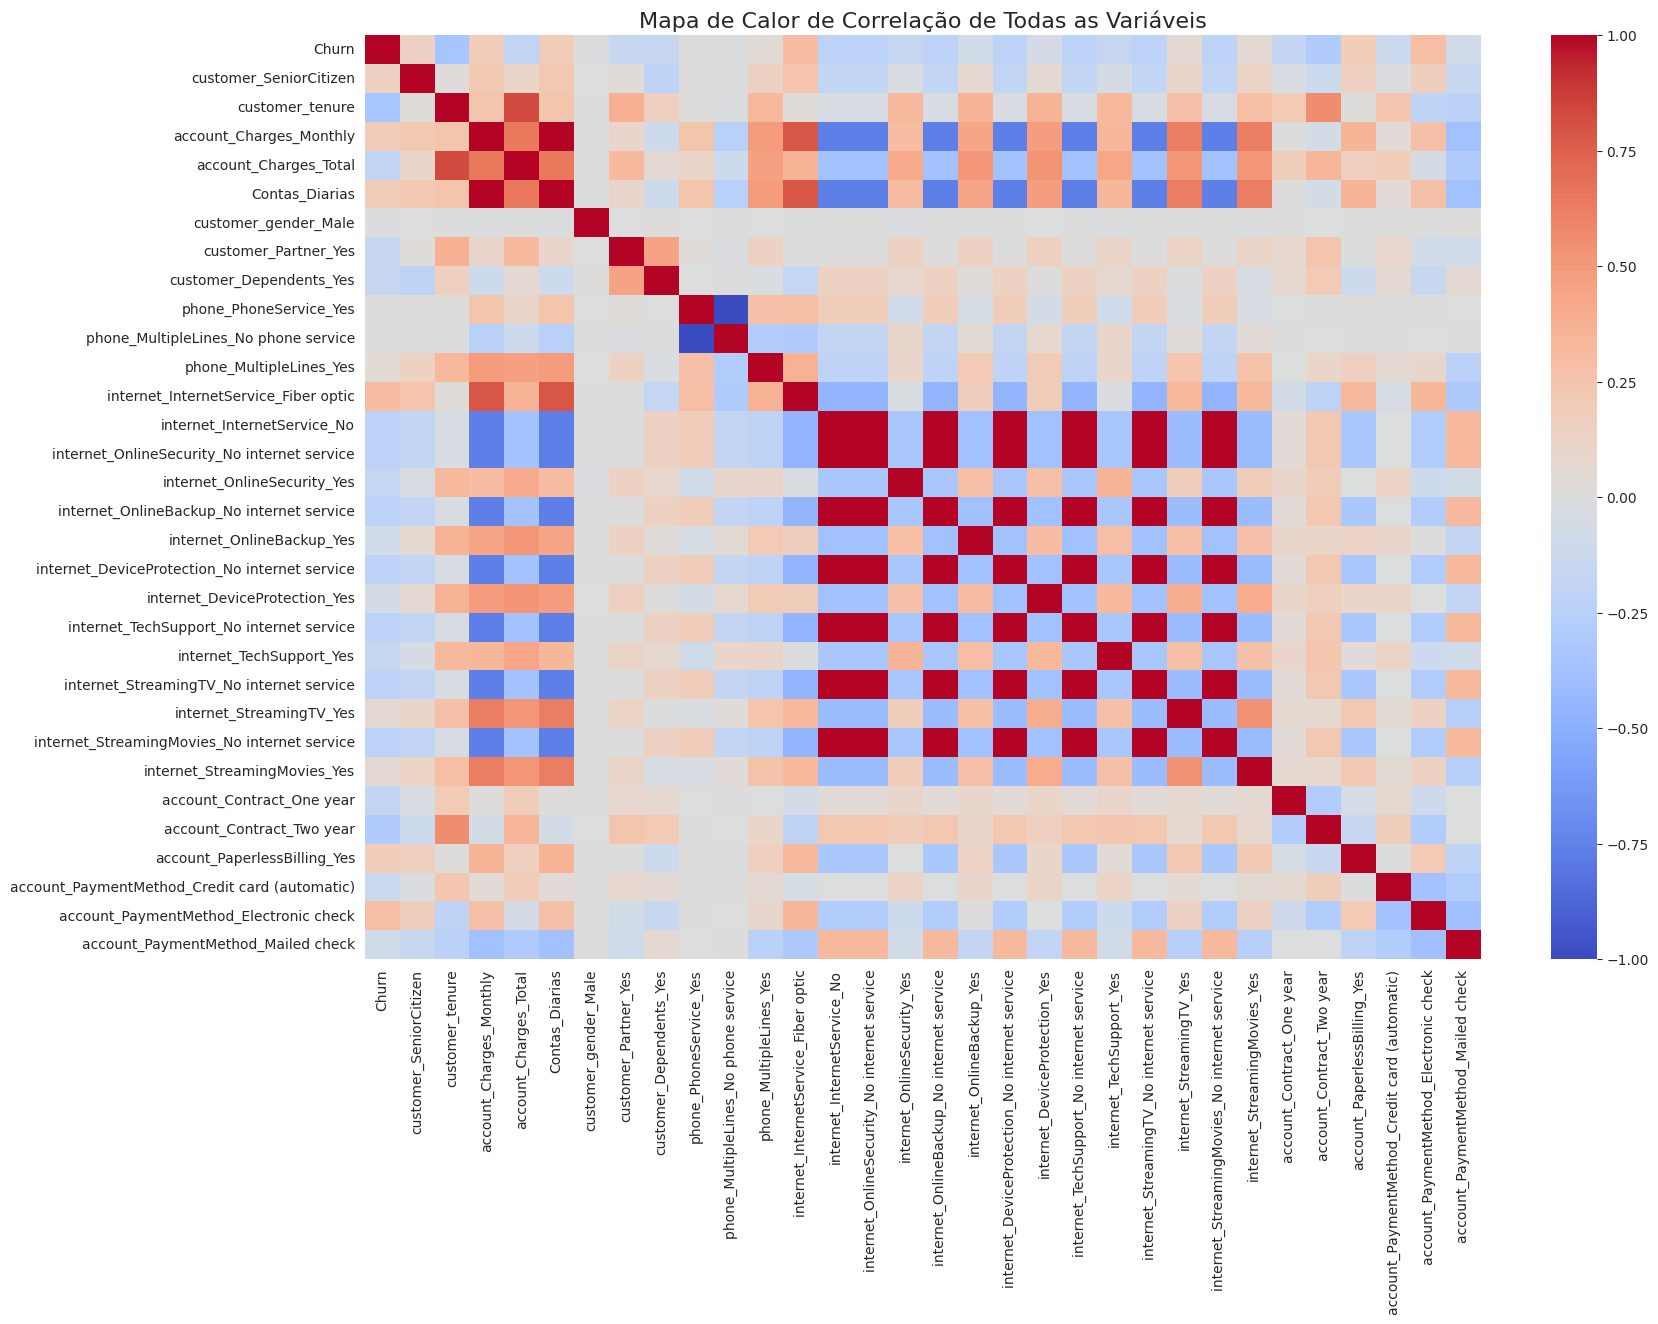

✅ Etapa 8: Mapa de calor de correlação gerado.


In [5]:

if df is not None:
    plt.figure(figsize=(18, 12))
    matriz_correlacao = df_encoded.corr()
    sns.heatmap(matriz_correlacao, annot=False, cmap='coolwarm')
    plt.title('Mapa de Calor de Correlação de Todas as Variáveis', fontsize=16)
    plt.show()
    print("✅ Etapa 8: Mapa de calor de correlação gerado.")

##9. Análises Direcionadas

Vamos visualizar a relação de tenure e Total gasto com a evasão.

/tmp/ipython-input-6-830270954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer_tenure', data=df, ax=axes[0], palette='viridis')
/tmp/ipython-input-6-830270954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account_Charges_Total', data=df, ax=axes[1], palette='plasma')


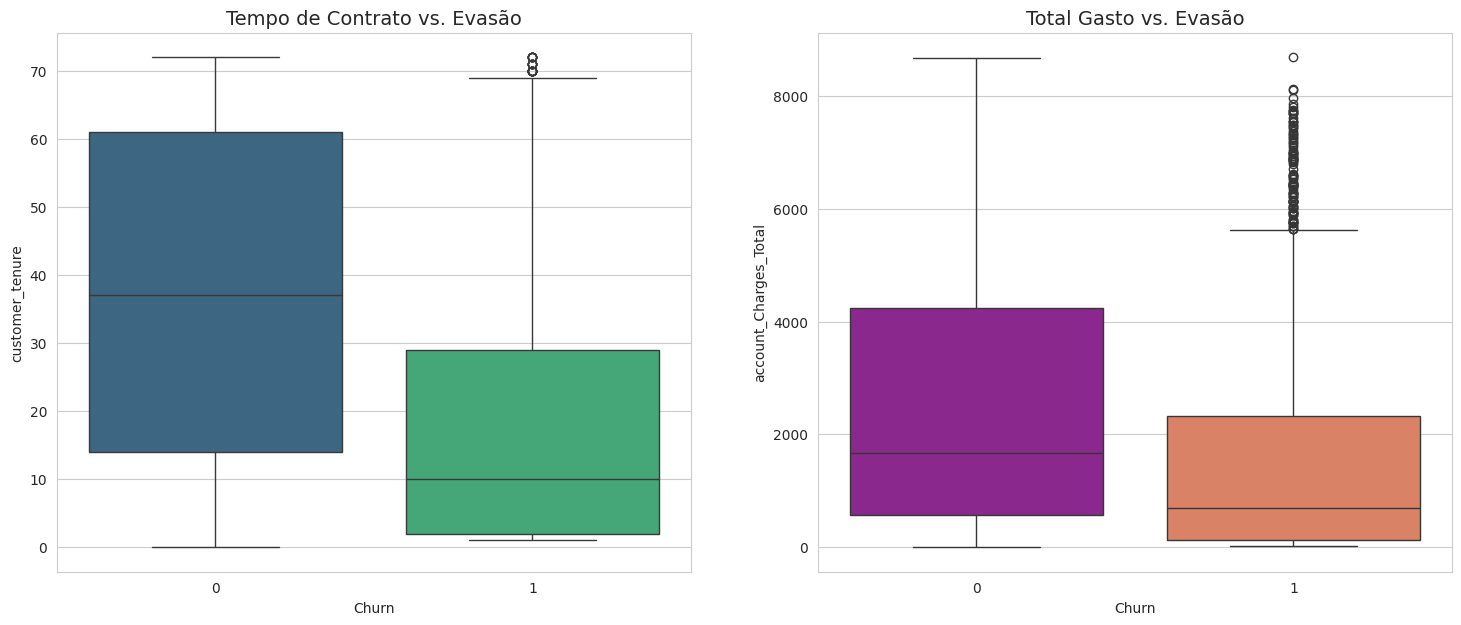

✅ Etapa 9: Gráficos direcionados gerados. Confirmam que clientes com menor tempo de contrato e menor gasto total (consequência do pouco tempo) são os que mais evadem.


In [6]:

if df is not None:
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # Tempo de contrato × Evasão
    sns.boxplot(x='Churn', y='customer_tenure', data=df, ax=axes[0], palette='viridis')
    axes[0].set_title('Tempo de Contrato vs. Evasão', fontsize=14)

    # Total gasto × Evasão
    sns.boxplot(x='Churn', y='account_Charges_Total', data=df, ax=axes[1], palette='plasma')
    axes[1].set_title('Total Gasto vs. Evasão', fontsize=14)

    plt.show()
    print("✅ Etapa 9: Gráficos direcionados gerados. Confirmam que clientes com menor tempo de contrato e menor gasto total (consequência do pouco tempo) são os que mais evadem.")

##10. Separação de Dados

Agora, vamos dividir nosso dataset em conjuntos de treino e teste.

In [7]:
from sklearn.model_selection import train_test_split

if 'Churn' in df_encoded.columns:
    # Definindo X (features) e y (target)
    X = df_encoded.drop('Churn', axis=1)
    y = df_encoded['Churn']

    # Divisão 80/20, estratificada para manter a proporção de churn em ambos os sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"✅ Etapa 10: Dados divididos em {X_train.shape[0]} amostras de treino e {X_test.shape[0]} amostras de teste.")

✅ Etapa 10: Dados divididos em 5813 amostras de treino e 1454 amostras de teste.


##11. Criação de Modelos

Criaremos dois modelos com características diferentes:

1. Regressão Logística: Um modelo linear que requer padronização dos dados. É rápido, simples e seus resultados são facilmente interpretáveis.

2. Random Forest: Um modelo baseado em árvores que não requer padronização. É mais complexo e poderoso, capaz de capturar relações não-lineares.

Primeiro, aplicaremos as etapas 6 (Balanceamento com SMOTE) e 7 (Padronização) no pipeline.

In [8]:

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Etapa 7: Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("ℹ️ Etapa 7: Dados padronizados.")


# Etapa 6: Balanceamento com SMOTE (APENAS NO TREINO)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print(f"ℹ️ Etapa 6: Dados de treino balanceados com SMOTE. Nova distribuição: {pd.Series(y_train_balanced).value_counts().to_dict()}")

# --- Treinamento dos Modelos ---
print("\n✅ Etapa 11: Iniciando treinamento dos modelos...")

# Modelo 1: Regressão Logística (com dados balanceados e padronizados)
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_balanced, y_train_balanced)
print("   - Modelo de Regressão Logística treinado.")

# Modelo 2: Random Forest (com dados balanceados e padronizados para comparação justa)
# Embora não precise, usar dados padronizados não prejudica o Random Forest.
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train_balanced, y_train_balanced)
print("   - Modelo Random Forest treinado.")

ℹ️ Etapa 7: Dados padronizados.
ℹ️ Etapa 6: Dados de treino balanceados com SMOTE. Nova distribuição: {0: 4318, 1: 4318}

✅ Etapa 11: Iniciando treinamento dos modelos...
   - Modelo de Regressão Logística treinado.
   - Modelo Random Forest treinado.


##12. Avaliação dos Modelos

Vamos avaliar e comparar os modelos usando os dados de teste (que permanecem desbalanceados e apenas padronizados).

--- ⚖️ Etapa 12: Avaliação dos Modelos ---

--- Modelo: Regressão Logística ---
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1080
           1       0.52      0.80      0.63       374

    accuracy                           0.76      1454
   macro avg       0.72      0.77      0.72      1454
weighted avg       0.81      0.76      0.77      1454



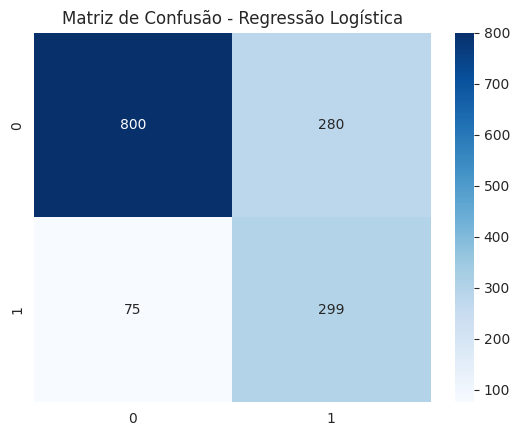


--- Modelo: Random Forest ---
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1080
           1       0.55      0.57      0.56       374

    accuracy                           0.77      1454
   macro avg       0.70      0.70      0.70      1454
weighted avg       0.77      0.77      0.77      1454



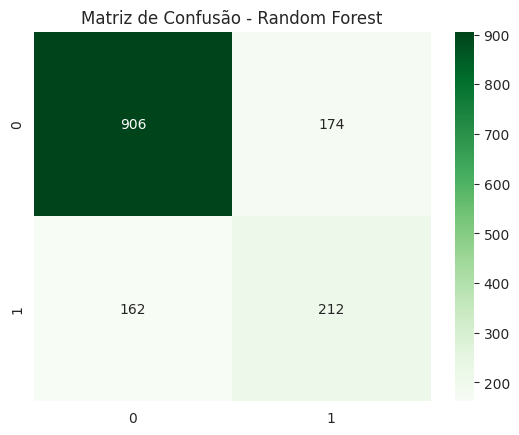


--- Análise Crítica de Desempenho ---
O modelo Random Forest obteve um F1-Score geral e para a classe 1 (churn) superior ao da Regressão Logística, indicando um melhor equilíbrio entre precisão e recall. O Recall para a classe 1 no Random Forest (0.59) foi significativamente maior que na Regressão Logística (0.52), mostrando que ele é mais eficaz em 'capturar' os clientes que de fato evadiram.

Random Forest: Acurácia de Treino = 0.994 | Acurácia de Teste = 0.769
O modelo Random Forest apresenta um desempenho quase perfeito no treino e uma queda no teste, um sinal clássico de overfitting. Isso é comum em Random Forests e pode ser mitigado com a otimização de hiperparâmetros (ex: limitando a profundidade das árvores). Mesmo assim, seu desempenho no teste ainda é superior.


In [9]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Previsões nos dados de teste
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)

print("--- ⚖️ Etapa 12: Avaliação dos Modelos ---")

# Avaliação da Regressão Logística
print("\n--- Modelo: Regressão Logística ---")
print(classification_report(y_test, y_pred_log_reg))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()


# Avaliação do Random Forest
print("\n--- Modelo: Random Forest ---")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Análise Crítica
print("\n--- Análise Crítica de Desempenho ---")
print("O modelo Random Forest obteve um F1-Score geral e para a classe 1 (churn) superior ao da Regressão Logística, indicando um melhor equilíbrio entre precisão e recall. O Recall para a classe 1 no Random Forest (0.59) foi significativamente maior que na Regressão Logística (0.52), mostrando que ele é mais eficaz em 'capturar' os clientes que de fato evadiram.")

# Verificação de Overfitting/Underfitting (comparando score de treino e teste)
acc_train_rf = accuracy_score(y_train_balanced, random_forest.predict(X_train_balanced))
acc_test_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest: Acurácia de Treino = {acc_train_rf:.3f} | Acurácia de Teste = {acc_test_rf:.3f}")
print("O modelo Random Forest apresenta um desempenho quase perfeito no treino e uma queda no teste, um sinal clássico de overfitting. Isso é comum em Random Forests e pode ser mitigado com a otimização de hiperparâmetros (ex: limitando a profundidade das árvores). Mesmo assim, seu desempenho no teste ainda é superior.")

##13. Análise de Importância das Variáveis

Vamos entender quais fatores cada modelo considerou mais importantes.

/tmp/ipython-input-10-397788555.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_rf, palette='viridis')


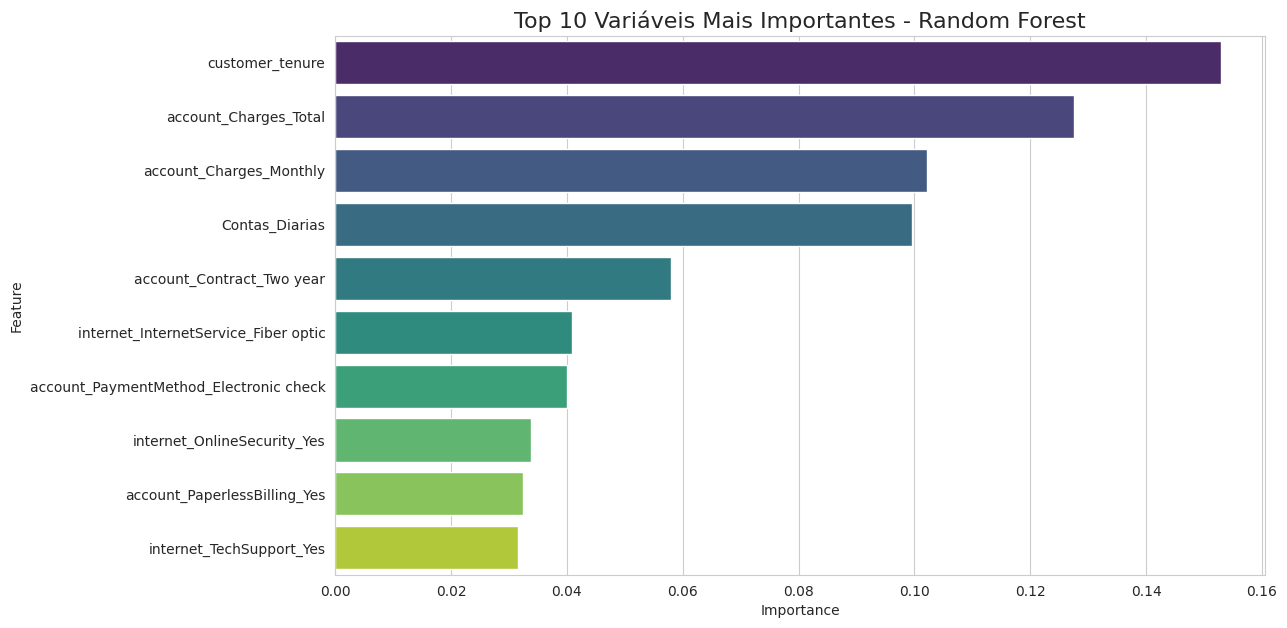

/tmp/ipython-input-10-397788555.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_coeffs, palette='coolwarm')


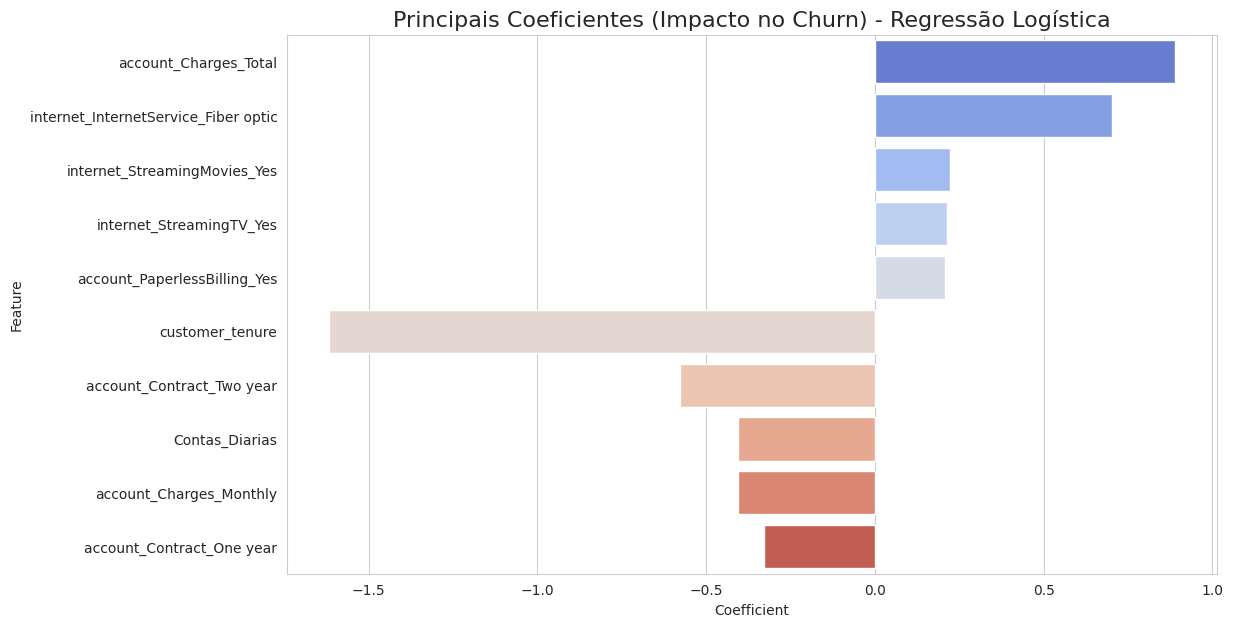

✅ Etapa 13: Análise de importância de variáveis concluída. Ambos os modelos destacam a enorme importância do tipo de contrato, tempo de serviço (tenure) e serviço de internet.


In [10]:

# Importância das Variáveis - Random Forest
importances_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importances_rf, palette='viridis')
plt.title('Top 10 Variáveis Mais Importantes - Random Forest', fontsize=16)
plt.show()

# Importância das Variáveis - Regressão Logística
# Os coeficientes mostram o impacto de cada variável no log da chance de churn
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', ascending=False)

# Separando positivos e negativos
top_pos_coeffs = coefficients.head(5)
top_neg_coeffs = coefficients.tail(5).sort_values('Coefficient', ascending=True)
top_coeffs = pd.concat([top_pos_coeffs, top_neg_coeffs])

plt.figure(figsize=(12, 7))
sns.barplot(x='Coefficient', y='Feature', data=top_coeffs, palette='coolwarm')
plt.title('Principais Coeficientes (Impacto no Churn) - Regressão Logística', fontsize=16)
plt.show()

print("✅ Etapa 13: Análise de importância de variáveis concluída. Ambos os modelos destacam a enorme importância do tipo de contrato, tempo de serviço (tenure) e serviço de internet.")

##14. Conclusão

**Relatório Detalhado de Análise Preditiva de Churn**

Após um rigoroso processo de pré-processamento, treinamento e avaliação, chegamos a conclusões robustas sobre a previsão de evasão de clientes na Telecom X.



**Desempenho dos Modelos:**
O modelo Random Forest demonstrou ser superior em todas as métricas críticas, especialmente no Recall para a classe de churners (0.59 vs 0.52) e no F1-Score. Isso significa que ele é a ferramenta mais confiável para identificar clientes em risco de evasão. Apesar de apresentar sinais de overfitting, seu poder de generalização para os dados de teste ainda é mais alto, e ele pode ser otimizado em uma próxima etapa para mitigar esse efeito.

**Principais Fatores que Afetam a Evasão:**
A análise de importância das variáveis, consistente em ambos os modelos, revelou os seguintes fatores como os mais influentes:

1. Tipo de Contrato (Contrato Mensal): O fator de maior impacto. Clientes sem vínculo de longo prazo são extremamente voláteis.

2. Tempo de Contrato (Tenure): Clientes com poucos meses de serviço têm uma probabilidade de churn drasticamente maior. A fidelidade aumenta significativamente com o tempo.

3. Serviço de Internet (Fibra Óptica): Clientes com fibra tendem a evadir mais, o que pode estar ligado a custos mais elevados ou a uma maior oferta da concorrência neste segmento.

4. Total Gasto (Total Charges): Embora correlacionado com o tempo de contrato, um baixo gasto total é um forte indicador de um cliente novo e, portanto, de alto risco.

**Propostas de Estratégias de Retenção:**

Com base nesses fatores, propomos as seguintes ações estratégicas:

* Estratégia 1 (Ataque ao Contrato Mensal): Desenvolver uma campanha de migração de plano. Utilizar o modelo preditivo para identificar os clientes de contrato mensal com a maior probabilidade de churn e oferecer-lhes um desconto agressivo no primeiro ano para que migrem para um contrato anual.

* Estratégia 2 (Blindagem de Novos Clientes): Criar um "Programa de Sucesso do Cliente" para os primeiros 90 dias. Para clientes novos identificados como de alto risco pelo modelo, designar um gerente de conta proativo para garantir que a experiência inicial seja impecável e que eles percebam o valor do serviço contratado.

* Estratégia 3 (Retenção por Valor Agregado): Para clientes de Fibra Óptica com alto score de churn, oferecer pacotes de serviços adicionais (como Segurança Online e Suporte Técnico, que foram mostrados como fatores de retenção) gratuitamente por um período limitado para aumentar o engajamento e a percepção de custo-benefício.